# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
import re, requests

def get_attributes(names_url: str) -> dict:
    r = requests.get(names_url)
    
    attr_found, blank_count = [False] * 2
    attrs = {}
    for i, line in enumerate(r.text.split('\n')):
        if 'Attribute Information' in line:
            attr_found = True
            continue
            
        if attr_found and not line:
            blank_count += 1

            if blank_count==2:
                break
            continue
            
        if attr_found:
            attr = re.sub('[\t]|\.', '', line).split(':')
            key = attr[0].strip()
            value = attr[1]
            attrs[key] = value

    return attrs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names'

attrs = get_attributes(names_url)
df = pd.read_csv(data_url, names=attrs.keys())
df = df.replace({'?':np.nan})

In [3]:
df.isna().sum() #matches the names page from uci

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [4]:
for col in df:
    if 'continuous' in attrs[col]:
        df[col] = pd.to_numeric(df[col], downcast='float')

In [5]:
df.dtypes

A1      object
A2     float32
A3     float32
A4      object
A5      object
A6      object
A7      object
A8     float32
A9      object
A10     object
A11    float32
A12     object
A13     object
A14    float32
A15    float32
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

A1


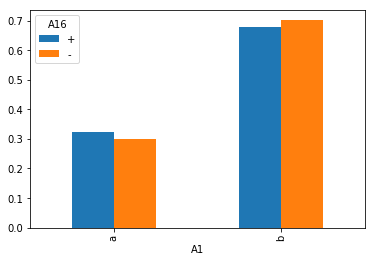

A2


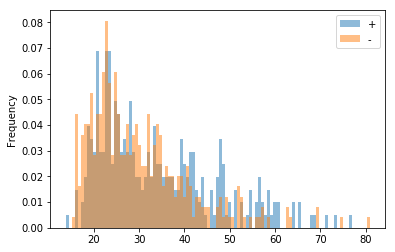

A3


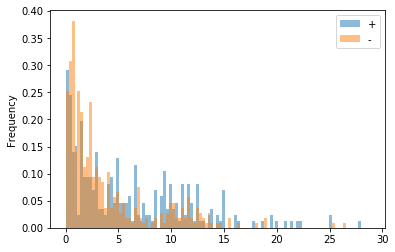

A4


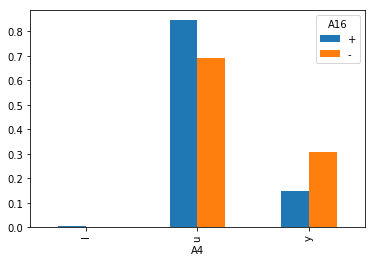

A5


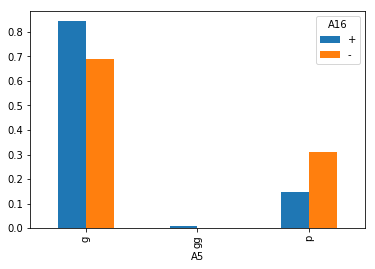

A6


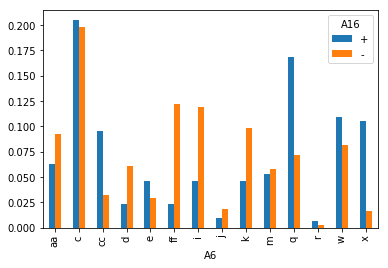

A7


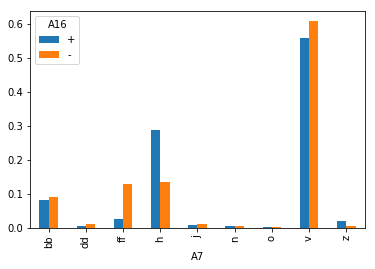

A8


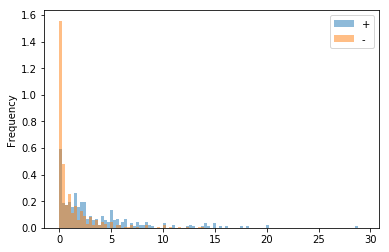

A9


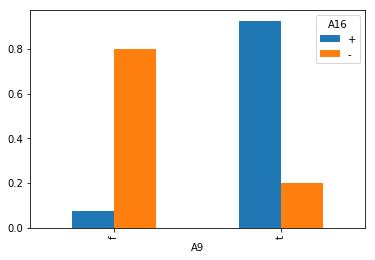

A10


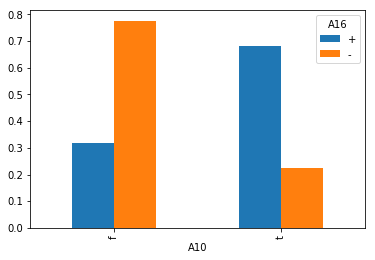

A11


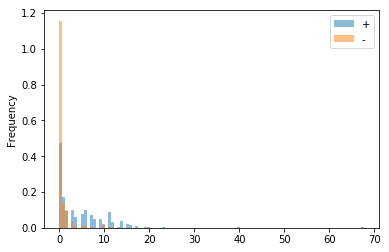

A12


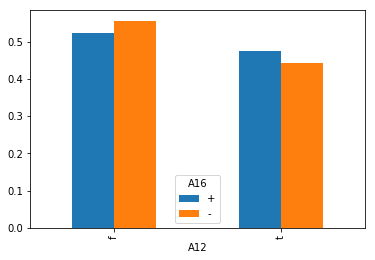

A13


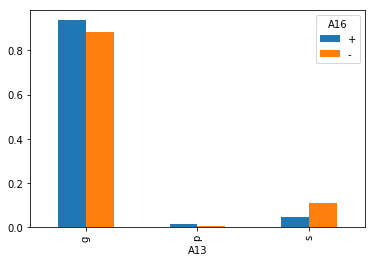

A14


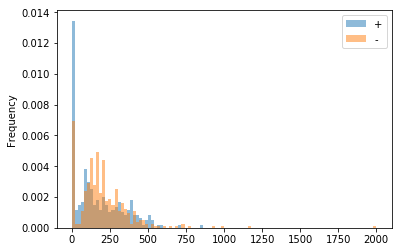

A15


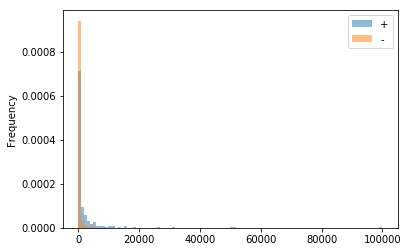

A16


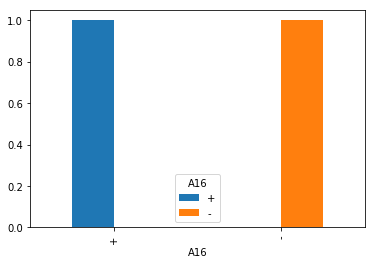

In [6]:
for col in df:
    print(col)
    if col in df.select_dtypes(include=np.number).columns:
        min_bin = min(df[col])
        max_bin = max(df[col])
        size = (max_bin-min_bin) / 100
        grouped = df.groupby('A16')[col]
        # not sure why this returns a series of axes
        ax = grouped.plot.hist(bins=np.arange(min_bin, max_bin + 1, size), 
                               alpha=0.5, density=True)
        ax = ax[1].legend()
    else:
        ax = pd.crosstab(df['A16'], df[col], normalize='index').T.plot.bar()

    plt.show();

A11
p   4.310274591722058e-23
t   10.638418482070332
dof 690


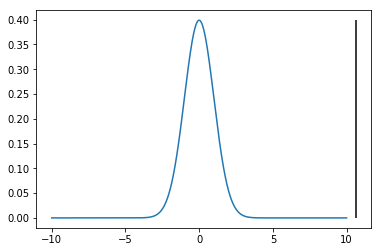

A14
p   0.0077778250827957
t   -2.6696493137915973
dof 690


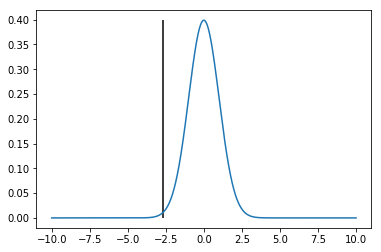

In [7]:
# Continuous case, A11 and A14 seem significant
from scipy import stats

for col in ['A11', 'A14']:
    t_stat, p = stats.ttest_ind(df.loc[df['A16']=='+', col],
                                df.loc[df['A16']=='-', col],
                                nan_policy='omit',
                                equal_var=False)
    dof = len(df['A16'].dropna())
    print(col, f'p   {p}', f't   {t_stat}', f'dof {dof}', sep='\n')
    
    x = np.linspace(-10,10,1000)
    y = stats.t(dof).pdf(x)
    plt.plot(x, y)
    plt.vlines(x=t_stat, ymin=0, ymax=max(y))
    plt.show();

In [8]:
stats.chi2_contingency?

A4

A16    +    -
A4           
l      2    0
u    249  250
y     45  107

[[  0.90658499   1.09341501]
 [226.19295559 272.80704441]
 [ 68.90045942  83.09954058]]

p    1.8613463470618034e-05

chi2 21.78325079317282

dof  2


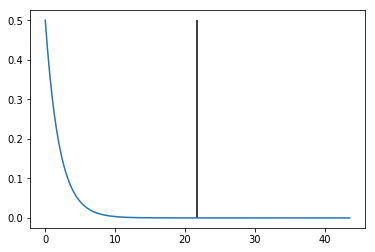

A7

A16    +    -
A7           
bb    24   29
dd     2    4
ff     8   46
h     87   50
j      3    5
n      2    2
o      1    1
v    163  218
z      6    2

[[ 24.0245023   28.9754977 ]
 [  2.71975498   3.28024502]
 [ 24.47779479  29.52220521]
 [ 62.10107198  74.89892802]
 [  3.62633997   4.37366003]
 [  1.81316998   2.18683002]
 [  0.90658499   1.09341501]
 [172.70444104 208.29555896]
 [  3.62633997   4.37366003]]

p    8.829142688919391e-07

chi2 42.988254470828515

dof  8


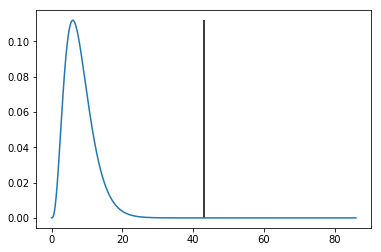

In [9]:
# Categorical case, A4 seems to have diffs in y category, A7 seems to have diffs in ff and v categories

for col in ['A4', 'A7']:
    crosstab = pd.crosstab(df.dropna().loc[:, col], df.dropna().loc[:, 'A16'])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(col, crosstab, expected, f'p    {p}', f'chi2 {chi2}', 
          f'dof  {dof}', sep='\n\n')
    
    x = np.linspace(0,chi2*2,1000)
    y = stats.chi2(dof).pdf(x)
    plt.plot(x, y)
    plt.vlines(x=chi2, ymin=0, ymax=max(y))
    plt.show();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

## t-test
* **A11** - observations resulting in '+' were significantly greater in value along the 'A11' feature continuum (p < 0.05)
* **A14** - observations resulting in '+' were significantly lesser in value along the 'A14' feature continuum (p < 0.05)

## Chi-square
* **A4** - membership in '+' or '-' classification is associated with significantly different group membership among categories of the 'A4' feature space (p < 0.05). In particular, groups 'l' and 'u'. However, expected values were < 5 in some cases, which is generally ill-advised for chisquare analysis.
* **A7** - membership in '+' or '-' classification is associated with significantly different group membership among categories of the 'A4' feature space (p < 0.05). In particular, groups 'ff' and 'h'. However, expected values were < 5 in some cases, which is generally ill-advised for chisquare analysis.